# Modeling

In [60]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import keras

## Load In Data

### Y Data

In [6]:
#X Data
with open('X_seq.pkl','rb') as f:
    X = pickle.load(f)
    print(len(X))
    
#Y Data
with open('Y_seq.pkl','rb') as f:
    Y = pickle.load(f)
    print(len(Y))


459
459


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [8]:
X_train[0]

array([[-1.5624084 , 14.683273  , -0.9439697 , ..., -0.38991818,
         1.2669762 , -1.571371  ],
       [-0.5577622 , -0.645668  , -2.284401  , ..., -1.4669006 ,
         4.0297394 , -2.00014   ],
       [-2.6378174 ,  5.764572  , -4.052574  , ..., -0.5433163 ,
         2.498422  , -1.6693754 ],
       ...,
       [-2.893631  ,  5.0806503 ,  2.6187515 , ..., -1.4893347 ,
         0.33080187,  0.01489213],
       [-3.7317886 ,  9.850098  ,  2.3522415 , ..., -1.3881346 ,
         0.5603664 , -0.20934604],
       [-1.7588043 ,  8.342842  ,  1.8217087 , ..., -0.954572  ,
         0.8075077 , -0.9150837 ]], dtype=float32)

In [9]:
def Scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = []
    X_test_scaled = []
    for i in range(len(X_train)):
        scaler.fit(X_train[i])
        X_train_scaled.append(scaler.transform(X_train[i]))
    for i in range(len(X_test)):
        X_test_scaled.append(scaler.transform(X_test[i]))
    return np.array(X_train_scaled), np.array(X_test_scaled)

In [11]:
X_train_scaled, X_test_scaled = Scaler(X_train, X_test)
print("X Train Shape: ", X_train_scaled.shape)
print("X Test Shape: ", X_test_scaled.shape)
print("Number of features: ", len(X[0]))
print("Number of observations: ", len(X[0][0]))

X Train Shape:  (344, 3601, 12)
X Test Shape:  (115, 3601, 12)
Number of features:  3601
Number of observations:  12


In [19]:
y_format_train = []
for i in range(344):
    y_format_train.append(y_train[i].todense())
y_train_array = np.array(y_format_train)
y_train_array.shape

y_format_test = []
for i in range(115):
    y_format_test.append(y_test[i].todense())
y_test_array = np.array(y_format_test)
y_test_array.shape

(115, 3601, 19)

# Construct a Baseline Model

In [64]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(3601, 12), return_sequences = True))
model.add(Dense(19, activation="softmax")) #softmax for classification
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 3601, 64)          19712     
_________________________________________________________________
dense_15 (Dense)             (None, 3601, 19)          1235      
Total params: 20,947
Trainable params: 20,947
Non-trainable params: 0
_________________________________________________________________


In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

history1 = model.fit(X_train_scaled, y_train_array, validation_data=(X_test_scaled, y_test_array), epochs = 10, 
          batch_size = 10, callbacks = [callback], verbose = 1)

Epoch 1/10
35/35 [==============================] - 58s 2s/step - loss: 2.9446 - accuracy: 0.0568 - val_loss: nan - val_accuracy: 0.0587
Epoch 2/10
35/35 [==============================] - 75s 2s/step - loss: 2.9372 - accuracy: 0.0610 - val_loss: nan - val_accuracy: 0.0589
Epoch 3/10
35/35 [==============================] - 65s 2s/step - loss: 2.9302 - accuracy: 0.0656 - val_loss: nan - val_accuracy: 0.0611
Epoch 4/10
35/35 [==============================] - 45s 1s/step - loss: 2.9235 - accuracy: 0.0692 - val_loss: nan - val_accuracy: 0.0551
Epoch 5/10
35/35 [==============================] - 45s 1s/step - loss: 2.9170 - accuracy: 0.0728 - val_loss: nan - val_accuracy: 0.0555
Epoch 6/10
35/35 [==============================] - 45s 1s/step - loss: 2.9107 - accuracy: 0.0749 - val_loss: nan - val_accuracy: 0.0538
Epoch 7/10
35/35 [==============================] - 52s 1s/step - loss: 2.9043 - accuracy: 0.0766 - val_loss: nan - val_accuracy: 0.0402
Epoch 8/10
35/35 [=======================

In [45]:
model2 = Sequential()
model2.add(LSTM(128, activation='relu', input_shape=(3601, 12), return_sequences = True))
model2.add(LSTM(256, activation='relu', return_sequences=True))
model2.add(LSTM(64, activation='relu', return_sequences=True)) 
model2.add(Dense(19, activation="softmax")) #softmax for classification
opt = keras.optimizers.Adam(learning_rate=0.000001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 3601, 128)         72192     
_________________________________________________________________
lstm_29 (LSTM)               (None, 3601, 256)         394240    
_________________________________________________________________
lstm_30 (LSTM)               (None, 3601, 64)          82176     
_________________________________________________________________
dense_14 (Dense)             (None, 3601, 19)          1235      
Total params: 549,843
Trainable params: 549,843
Non-trainable params: 0
_________________________________________________________________


In [46]:
history2 = model2.fit(X_train_scaled, y_train_array, validation_data=(X_test_scaled, y_test_array), epochs = 50, 
          batch_size = 10, callbacks = [callback], verbose = 1)

Epoch 1/50
35/35 [==============================] - 272s 8s/step - loss: 2.9454 - accuracy: 0.0611 - val_loss: nan - val_accuracy: 0.0489
Epoch 2/50
35/35 [==============================] - 281s 8s/step - loss: 2.9453 - accuracy: 0.0616 - val_loss: nan - val_accuracy: 0.0572
Epoch 3/50
35/35 [==============================] - 270s 8s/step - loss: 2.9452 - accuracy: 0.0620 - val_loss: nan - val_accuracy: 0.0487
Epoch 4/50
35/35 [==============================] - 269s 8s/step - loss: 2.9451 - accuracy: 0.0624 - val_loss: nan - val_accuracy: 0.0465
Epoch 5/50
35/35 [==============================] - 264s 8s/step - loss: 2.9450 - accuracy: 0.0627 - val_loss: nan - val_accuracy: 0.0546
Epoch 6/50
35/35 [==============================] - 264s 8s/step - loss: 2.9448 - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0572
Epoch 7/50
35/35 [==============================] - 262s 7s/step - loss: 2.9447 - accuracy: 0.0632 - val_loss: nan - val_accuracy: 0.0515
Epoch 8/50
35/35 [================

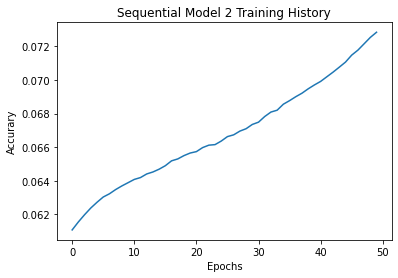

In [58]:
plt.plot(history2.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel('Accurary')
plt.title('Sequential Model 2 Training History')
plt.savefig('model_history_accuracy.png')
plt.show();

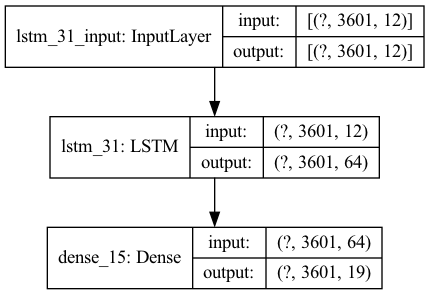

In [66]:
plot_model(model, to_file='model1_plot_seq.png', show_shapes=True, show_layer_names=True)

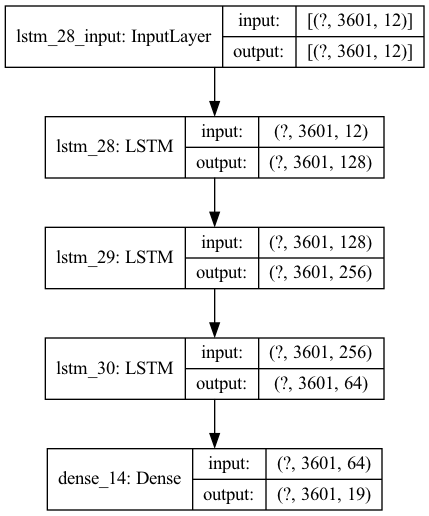

In [62]:
plot_model(model2, to_file='model2_plot_seq.png', show_shapes=True, show_layer_names=True)

In [48]:
#X Classifier Data
with open('Seq_Model_1_History.pkl','wb') as f:
    pickle.dump(history1.history, f)
    
#X Classifier Data
with open('Seq_Model_2_History.pkl','wb') as f:
    pickle.dump(history2.history, f)

In [152]:
# This is a list comprehension to switch the order of X_train, not sure if it is necessary or not
#X_train = [x.reshape(32409, 12) for x in X_train]

# Praveen
- I'm trying to construct a simple LSTM model as my baseline
- most common error is a dimesionality error (ex: "expected ndim=3, found ndim=2"
